In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime
import time

from sys import path
path.append(r'E:\data_mining\project\IJCAI-17-口碑\koubei')

import predict
import base
import shop_classify as sc

%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn import metrics

In [3]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [4]:
today = datetime.date.today()

In [5]:
tuned_parameters = {'learning_rate':[0.07, 0.09], 'n_estimators': [40, 50, 60],
                     'min_samples_split': [15, 20, 25], 'min_samples_leaf': [4, 6], 'max_depth': [3]}


rf = GradientBoostingClassifier(random_state=0)

clf = GridSearchCV(rf, tuned_parameters, cv=4, scoring='recall')
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

NameError: name 'X_train' is not defined

In [7]:
#读取训练集
X_train_df = pd.read_csv('../data/train/classify_3/X_train.csv', index_col=0)
y_train_df = pd.read_csv('../data/train/classify_3/y_train.csv', index_col=0)

In [8]:
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X_train_df, y_train_df['type'], random_state=1, test_size=0.5)

In [9]:
#######rRF  , class_weight={1:3, 2:2}

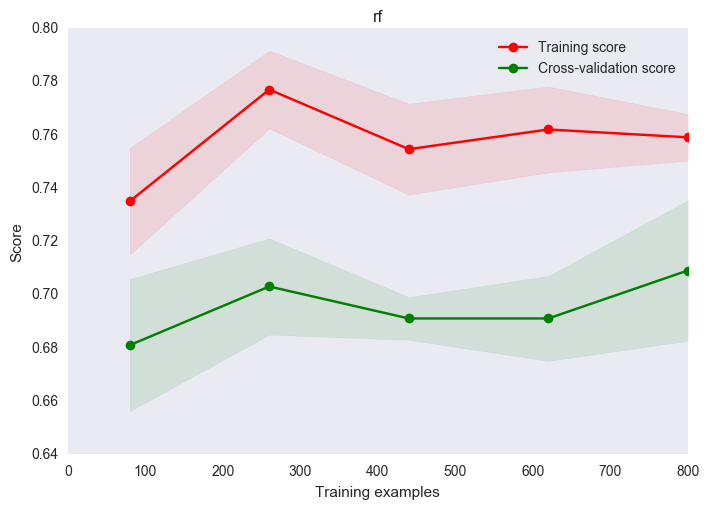

In [22]:
#n_estimators=50, max_depth=3, min_samples_split=20, min_samples_leaf=6, n_jobs=2, random_state=0, class_weight=None 0/0.002106/1
rf_classifier = RandomForestClassifier(
    n_estimators=150, max_depth=3, min_samples_split=30, min_samples_leaf=8, n_jobs=2, random_state=0, class_weight=None)
plot_learning_curve(rf_classifier, 'rf', X_train, y_train, cv=5)
plt.show()

In [12]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=8,
            min_samples_split=30, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=2, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [13]:
rf_classifier.score(X_test, y_test)

0.745

In [14]:
y_pred = rf_classifier.predict(X_test)

In [15]:
metrics.recall_score(y_test, y_pred, pos_label=0)

0.95526695526695526

In [16]:
metrics.precision_score(y_test, y_pred, pos_label=0)

0.74717832957110608

In [17]:
metrics.recall_score(y_test, y_pred, pos_label=1)

0.27035830618892509

In [18]:
metrics.precision_score(y_test, y_pred, pos_label=1)

0.72807017543859653

In [19]:
y_pred_df = pd.DataFrame(y_pred, index = y_test.index)

In [20]:
y_pred_df.to_csv('../data/train/classify_3/y_predict_rf.csv')

In [21]:
y_pred_df[y_pred_df[0] == 1].count()

0    114
dtype: int64

In [351]:
rf_classifier.feature_importances_

array([ 0.01002394,  0.00728177,  0.01328406,  0.1231945 ,  0.02702797,
        0.01179106,  0.00990877,  0.04504472,  0.0325781 ,  0.01123407,
        0.0090463 ,  0.00757309,  0.02061297,  0.01705105,  0.0089745 ,
        0.03592811,  0.00668193,  0.04249985,  0.00658393,  0.14458808,
        0.10708868,  0.03075624,  0.01248238,  0.05691595,  0.01497301,
        0.0055269 ,  0.00285975,  0.08520855,  0.0692445 ,  0.00861945,
        0.0154158 ])

In [325]:
#######GBDT

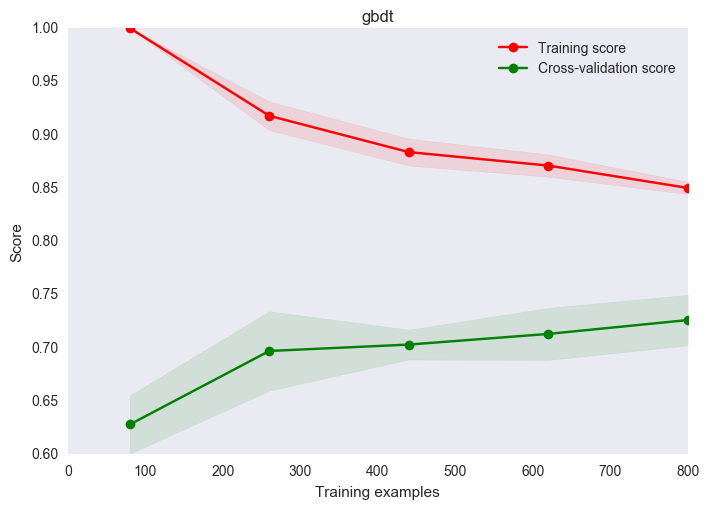

In [129]:
#learning_rate': 0.07, 'min_samples_split': 20, 'n_estimators': 60, 'max_depth': 3, 'min_samples_leaf': 6}
#(random_state=0, min_samples_split=20, max_depth=3, learning_rate=0.07, min_samples_leaf=6, n_estimators=60)
#{'learning_rate': 0.09, 'min_samples_split': 25, 'n_estimators': 60, 'max_depth': 3, 'min_samples_leaf': 6}
#(random_state=0, min_samples_split=25, max_depth=4, learning_rate=0.07, min_samples_leaf=6, n_estimators=20)0.02358
#(random_state=0, min_samples_split=20, max_depth=3, learning_rate=0.07, min_samples_leaf=6, n_estimators=40)0.001934
#(random_state=0, min_samples_split=23, max_depth=3, learning_rate=0.07, min_samples_leaf=6, n_estimators=40)0.002289
#random_state=0, min_samples_split=20, max_depth=3, learning_rate=0.07, min_samples_leaf=6, n_estimators=40 0/-0.002388/0.002587/3/4/5
learning_gbdt = GradientBoostingClassifier(random_state=0, min_samples_split=23, max_depth=3, learning_rate=0.07, min_samples_leaf=6, n_estimators=50)
plot_learning_curve(learning_gbdt, 'gbdt', X_train, y_train, cv=5)
plt.show()

In [130]:
learning_gbdt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.07, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=6,
              min_samples_split=23, min_weight_fraction_leaf=0.0,
              n_estimators=50, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

In [131]:
learning_gbdt.score(X_test, y_test)

0.73399999999999999

In [132]:
y_pred = learning_gbdt.predict(X_test)

In [133]:
metrics.recall_score(y_test, y_pred, pos_label=0)

0.88744588744588748

In [134]:
metrics.precision_score(y_test, y_pred, pos_label=0)

0.76587795765877953

In [135]:
metrics.recall_score(y_test, y_pred, pos_label=1)

0.38762214983713356

In [136]:
metrics.precision_score(y_test, y_pred, pos_label=1)

0.60406091370558379

In [137]:
y_pred_df = pd.DataFrame(y_pred, index=y_test.index)

In [138]:
y_pred_df.to_csv('../data/train/classify_3/y_predict_gbdt.csv')

In [139]:
y_pred_df[y_pred_df[0] == 1].count()

0    197
dtype: int64

In [139]:
learning_gbdt.train_score_ 

array([ 1.23725461,  1.20837518,  1.18472379,  1.16176216,  1.14015874,
        1.11888732,  1.10105627,  1.08346828,  1.0679958 ,  1.05406898,
        1.03766179,  1.02180166,  1.00728858,  0.9918123 ,  0.97761879,
        0.96403162,  0.95236624,  0.93902878,  0.92647401,  0.91619351,
        0.90639681,  0.89513526,  0.8876539 ,  0.87734982,  0.86847051,
        0.86160474,  0.85471117,  0.84588294,  0.83930833,  0.82927014])

In [591]:
learning_gbdt.feature_importances_

array([ 0.02272475,  0.00829126,  0.01022986,  0.00607615,  0.02622826,
        0.06944693,  0.00588245,  0.01370089,  0.01404898,  0.03863075,
        0.02486751,  0.05229509,  0.        ,  0.02711578,  0.0138621 ,
        0.00247568,  0.01110724,  0.00254634,  0.01562327,  0.01728822,
        0.00307521,  0.02573991,  0.        ,  0.00361147,  0.00944884,
        0.        ,  0.02020663,  0.06872514,  0.04781784,  0.        ,
        0.        ,  0.        ,  0.03140776,  0.1662094 ,  0.02428916,
        0.00267046,  0.00805791,  0.00607571,  0.        ,  0.        ,
        0.00307206,  0.01913022,  0.09694517,  0.05430409,  0.01163826,
        0.        ,  0.00475479,  0.0053687 ,  0.00500976,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

In [68]:
y_test[y_test == 1].count()

311

In [335]:
y_pred_df[y_pred_df[0] == 1]

,0
784,1
121,1
363,1
116,1
1272,1
510,1
1259,1
1221,1
1891,1
632,1
